Populating the interactive namespace from numpy and matplotlib
pngs/000_20191024_ringland__1.png


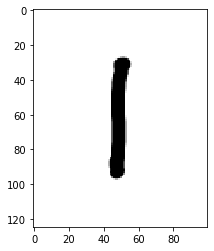

In [2]:
from PIL import Image
import glob
%pylab inline

pngs = sorted(glob.glob('pngs/*.png'))
for png in pngs:
    print(png)
    img = Image.open(png)
    imshow(img)
    break

Features:

amount of ink

something derived from 'slope' (not easy)

asymmetry - maybe difference in left&right-of-center ink

height and/or width or their ratio (aspect)

number of connected components of black or white

number of transitions on some special lines (horizontal or vertical center lines)

In [3]:
import numpy as np

In [4]:
a = np.array(img)
type(a), a.shape

(numpy.ndarray, (125, 100, 4))

In [5]:
a = a[:,:,0] # use just the red layer
a.shape

(125, 100)

In [6]:
a.dtype

dtype('uint8')

In [7]:
a = 255-a
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
pngs = sorted(glob.glob('pngs/*.png'))
n = len(pngs)
features = ['ink', 'logaspect', 'lrassym']
d = len(features)
F = np.empty((d,n))
x = linspace(0,w,w,endpoint=False)
y = linspace(0,h,h,endpoint=False)
X,Y = np.meshgrid(x,y)

for k, png in enumerate( pngs ):
    #print(png)
    img = Image.open(png)
    #imshow(img)
    a = np.array(img)
    a = a[:,:,0]   # get just one layer- all the same
    a = 255-a      # invert values
    ink = a.sum()/(h*w*255)  # scaled to [0,1]  # maybe too extreme?  # better alternatives
    if ink == 0: continue
    F[0, k] = ink
    
    #next - height and width of character
    #width
    colsums = a.sum(axis=0)
    #want first column where sum is positive
    #xmin = np.argmin(colsums>0)
    
    xmin = X[ a>0 ].min()
    xmax = X[ a>0 ].max()
    ymin = Y[ a>0 ].min()
    ymax = Y[ a>0 ].max()
    logaspect = np.log10((ymax - ymin)/(xmax - xmin))
    F[1,k] = logaspect
    
    #left-right assymetry
    cbbx = (xmin+xmax)/2
    cogx = (X*a).sum() / a.sum()
    lrassym = (cogx - cbbx) / (xmax - xmin)
    F[2, k] = lrassym
    
    #break
    
#F

NameError: name 'w' is not defined

In [ ]:
x = linspace(0,w,w,endpoint=False)
x

In [ ]:
y = linspace(0,h,h,endpoint=False)
y

In [ ]:
X,Y = np.meshgrid(x,y)

In [ ]:
X, Y

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
figure(figsize=(10,10))
for i in range(d):
    for j in range(d):
        plt.subplot(d,d,i*d+j+1)
        if i == j :
            plt.text(.5,.5,features[i], ha = 'center')
        else:
            plt.plot( F[j,:], F[i,:], 'o', alpha=0.5 )

In [ ]:
pngs = sorted(glob.glob('handwriting_f19/pngs/*.png'))#[:5]  # new cleaned pngs folder after class

n = len(pngs)
features = ['ink','log aspect','lr-asymmetry']
d = len(features)
F = np.empty((d,n))
x = arange(0,w) # linspace(0,w,w,endpoint=False)
y = arange(0,h) # linspace(0,h,h,endpoint=False)
X,Y = np.meshgrid(x,y)


for k,png in enumerate( pngs ):
        #print(png)
        img = Image.open(png)
        #imshow(img)
        a = np.array(img)
        a = a[:,:,0]  # get just one layer- they are all the same
        a = 255 - a   # invert so character is high values
        ink  = a.sum() / (h*w*255)   # scaled to [0,1]  # maybe too extreme?  # better alternatives
        if ink == 0:
            print('Blank image:',png)
            assert ink>0
        F[0 ,k] = ink

        # height and width of character
        xmin = X[ a>0 ].min()
        xmax = X[ a>0 ].max()
        ymin = Y[ a>0 ].min()
        ymax = Y[ a>0 ].max()
        logaspect = np.log10((ymax-ymin)/(xmax-xmin))
        F[1 ,k] = logaspect

        # left-right asymmetry
        cbbx = (xmin+xmax)/2   # center of bounding box
        cogx = (X*a).sum() / a.sum() # x-coordinate of center of mass of ink
        lrasymmetry = (cogx-cbbx) / (xmax-xmin)
        F[2 ,k] = lrasymmetry

#print(F)
plt.figure(figsize=(12,12))
for i in range(d):
        for j in range(d):
            plt.subplot(d,d,i*d+j+1)
            if i==j:
                plt.text(.5,.5,features[i],ha='center')
                plt.xticks([])
                plt.yticks([])
            else:
                plt.scatter( F[j,:], F[i,:] , s=2, alpha=0.4 )